데이터전처리 : Name, Ticket지우기
Cabin이없으면 0 있으면 1, 성별이 여성이면 0, 남성이면 1
get_dummies해주고, 정규분포내의 값으로 바꿔주기

In [227]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
df_train = pd.io.parsers.read_csv("titanic_train.csv")
df_train.head()
#logistic, naive로 실시, metric과ㅏ roc커브로 성능지표 측정

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [228]:
y_data = df_train.pop("Survived")
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [229]:
df_test = pd.io.parsers.read_csv("titanic_test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [230]:
df_train.shape, df_test.shape

((891, 11), (418, 11))

In [231]:
df_all = pd.concat([df_train,df_test])
df_all.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [232]:
del df_all["Name"]
del df_all["Fare"]
del df_all["Ticket"]
del df_all["SibSp"]
del df_all["PassengerId"]
df_all.head()

,Pclass,Sex,Age,Parch,Cabin,Embarked
0,3,male,22.0,0,NaN,S
1,1,female,38.0,0,C85,C
2,3,female,26.0,0,NaN,S
3,1,female,35.0,0,C123,S
4,3,male,35.0,0,NaN,S


필요없는 데이터 제거 및 결손데이터 평균처리
나이-> 정규분포로
Cabin이 있으면 1 없으면 0(Cabin 0 = CabinX Cabin1 = CabinO)

In [234]:
for i in range(0,891):
    if type(df_train["Cabin"][i]) != float:
        df_train["Cabin"][i] = 1
    else:
        df_train["Cabin"][i] = 0

c:\users\hyuna\miniconda3\envs\ml_python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [121]:
df_train["Cabin"].head()

0    0
1    1
2    0
3    1
4    0
Name: Cabin, dtype: object

In [122]:
for i in range(0,418):
    if type(df_test["Cabin"][i]) != float:
        df_test["Cabin"][i] = 1
    else:
        df_test["Cabin"][i] = 0

c:\users\hyuna\miniconda3\envs\ml_python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\hyuna\miniconda3\envs\ml_python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
df_test["Cabin"].head()

0    0
1    0
2    0
3    0
4    0
Name: Cabin, dtype: object

In [124]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
from sklearn import preprocessing
df_all = pd.concat([df_train,df_test])
del df_all["Name"]
del df_all["Ticket"]
del df_all["PassengerId"]
le = LabelEncoder()
df_all["Sex"] = le.fit_transform(df_all["Sex"])#여성은 0남성은 1#Cabin이 없으면 0 있으면 1
df_all["Age"] = df_all["Age"].fillna(df_all["Age"].mean())
pd.get_dummies(df_all).head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_0,Cabin_1,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,1,0,0,0,1
1,1,0,38.0,1,0,71.2833,0,1,1,0,0
2,3,0,26.0,0,0,7.9250,1,0,0,0,1
3,1,0,35.0,1,0,53.1000,0,1,0,0,1
4,3,1,35.0,0,0,8.0500,1,0,0,0,1


In [125]:
df_all["Man"] = pd.get_dummies(df_all["Sex"])[0]
df_all["Woman"] = pd.get_dummies(df_all["Sex"])[1]
df_all["Pclass_1"]= pd.get_dummies(df_all["Pclass"])[1]
df_all["Pclass_2"]= pd.get_dummies(df_all["Pclass"])[2]
df_all["Pclass_3"]= pd.get_dummies(df_all["Pclass"])[3]
del df_all["Pclass"]
del df_all["Sex"]
pd.get_dummies(df_all).head()

,Age,SibSp,Parch,Fare,Man,Woman,Pclass_1,Pclass_2,Pclass_3,Cabin_0,Cabin_1,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,0,0,1,1,0,0,0,1
1,38.0,1,0,71.2833,1,0,1,0,0,0,1,1,0,0
2,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,1,0,0,0,1,0,0,1
4,35.0,0,0,8.0500,0,1,0,0,1,1,0,0,0,1


In [198]:
df_new_all = pd.get_dummies(df_all)
list(df_new_all.columns)
df_new_all["Fare"] = df_new_all["Fare"].fillna(df_all["Fare"].mean())
df_new_all.head()

,Age,SibSp,Parch,Fare,Man,Woman,Pclass_1,Pclass_2,Pclass_3,Cabin_0,Cabin_1,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,0,0,1,1,0,0,0,1
1,38.0,1,0,71.2833,1,0,1,0,0,0,1,1,0,0
2,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,1,0,0,0,1,0,0,1
4,35.0,0,0,8.0500,0,1,0,0,1,1,0,0,0,1


In [201]:
sum_data = []
for i in df_new_all.columns:
    sum_data.append(sum(df_new_all[i]))
sum_data

[39114.409206500917,
 653,
 504,
 43583.782379281394,
 466,
 843,
 323,
 277,
 709,
 1014,
 295,
 270,
 123,
 914]

In [127]:
x_data = df_new_all.iloc[:891,0:].as_matrix()
x_predict = df_new_all.iloc[891:,0:].as_matrix()
y_data = y_data.as_matrix().reshape(-1,1)
x_data.shape,y_data.shape

((891, 14), (891, 1))

In [128]:
from sklearn import preprocessing #Min-Max Standarzation

min_max_scaler = preprocessing.MinMaxScaler()
x_data =min_max_scaler.fit_transform(x_data)
x_predict = min_max_scaler.fit_transform(x_predict)
df_new_all = min_max_scaler.fit_transform(df_new_all)
df_new_all[0]

array([ 0.27345609,  0.125     ,  0.        ,  0.01415106,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ])

In [191]:
import numpy as np
from sklearn.model_selection import train_test_split
training_idx = np.random.randint(y_data.shape[0],size=int(y_data.shape[0] * 0.8))
test_idx = np.random.randint(y_data.shape[0], size = int(y_data.shape[0] * 0.2))
x_train,x_test = x_data[training_idx, :], x_data[test_idx, :]
y_train,y_test = y_data[training_idx, :], y_data[test_idx, :]
x_train.shape,x_test.shape

((712, 14), (178, 14))

logistic Regression

In [130]:
from sklearn import linear_model, datasets

logreg = linear_model.LogisticRegression(fit_intercept=True)
logreg.fit(x_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [131]:
sum(logreg.predict(x_test)==y_test.ravel())/y_test.shape

array([   0.80898876,  144.        ])

In [133]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test,logreg.predict(x_test)))

             precision    recall  f1-score   support

          0       0.87      0.84      0.85       118
          1       0.70      0.75      0.73        60

avg / total       0.81      0.81      0.81       178



In [137]:
sum(logreg.predict(x_test)==y_test.ravel())/y_test.shape[0]

0.8089887640449438

In [140]:
print("생존자수는",sum(logreg.predict(x_predict)),"명으로 예측됩니다")

생존자수는 171 명으로 예측됩니다


Naive Bayes

In [211]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
Mult_NB = MultinomialNB()
Gauss_NB = GaussianNB()
Bernoull_NB = BernoulliNB()

Mult_NB.fit(x_train,y_train.ravel())
from sklearn.metrics import accuracy_score
print(accuracy_score(Mult_NB.predict(x_test),y_test),"의 정확도")
sum(Mult_NB.predict(x_test)==y_test.ravel())/y_test.shape
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test,Mult_NB.predict(x_test)))
sum(Mult_NB.predict(x_test)==y_test.ravel())/y_test.shape[0]
print("생존자수는",sum(Mult_NB.predict(x_predict)),"명으로 예측됩니다")

0.775280898876 의 정확도
             precision    recall  f1-score   support

          0       0.79      0.85      0.82       105
          1       0.75      0.67      0.71        73

avg / total       0.77      0.78      0.77       178

생존자수는 162 명으로 예측됩니다


In [212]:
Gauss_NB.fit(x_train,y_train.ravel())
print(accuracy_score(Gauss_NB.predict(x_test),y_test),"의 정확도")
sum(Gauss_NB.predict(x_test)==y_test.ravel())/y_test.shape
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test,Gauss_NB.predict(x_test)))
sum(Gauss_NB.predict(x_test)==y_test.ravel())/y_test.shape[0]
print("생존자수는",sum(Gauss_NB.predict(x_predict)),"명으로 예측됩니다")

0.780898876404 의 정확도
             precision    recall  f1-score   support

          0       0.82      0.80      0.81       105
          1       0.72      0.75      0.74        73

avg / total       0.78      0.78      0.78       178

생존자수는 201 명으로 예측됩니다


In [213]:
Bernoull_NB.fit(x_train,y_train.ravel())
print(accuracy_score(Bernoull_NB.predict(x_test),y_test),"의 정확도")
sum(Bernoull_NB.predict(x_test)==y_test.ravel())/y_test.shape
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test,Bernoull_NB.predict(x_test)))
sum(Bernoull_NB.predict(x_test)==y_test.ravel())/y_test.shape[0]
print("생존자수는",sum(Bernoull_NB.predict(x_predict)),"명으로 예측됩니다")

0.808988764045 의 정확도
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       105
          1       0.77      0.75      0.76        73

avg / total       0.81      0.81      0.81       178

생존자수는 184 명으로 예측됩니다


ROC커브

In [204]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [208]:
scores = logreg.predict_proba(x_test)[:,1]
y_real = y_test
fpr_lr, tpr_lr, thresholds = roc_curve(y_real,scores) 
roc_auc_lr = roc_auc_score(y_real,scores)

array([ 0.01369863,  0.04109589,  0.06849315,  0.09589041,  0.09589041,
        0.19178082,  0.21917808,  0.26027397,  0.28767123,  0.35616438,
        0.38356164,  0.39726027,  0.39726027,  0.42465753,  0.43835616,
        0.46575342,  0.49315068,  0.49315068,  0.50684932,  0.53424658,
        0.54794521,  0.54794521,  0.56164384,  0.56164384,  0.57534247,
        0.57534247,  0.61643836,  0.61643836,  0.63013699,  0.63013699,
        0.64383562,  0.64383562,  0.65753425,  0.65753425,  0.68493151,
        0.68493151,  0.71232877,  0.71232877,  0.73972603,  0.73972603,
        0.75342466,  0.75342466,  0.76712329,  0.76712329,  0.79452055,
        0.79452055,  0.82191781,  0.82191781,  0.82191781,  0.82191781,
        0.82191781,  0.82191781,  0.82191781,  0.82191781,  0.84931507,
        0.84931507,  0.8630137 ,  0.87671233,  0.87671233,  0.89041096,
        0.89041096,  0.89041096,  0.89041096,  0.91780822,  0.91780822,
        0.91780822,  0.91780822,  0.93150685,  0.93150685,  0.94

In [214]:
scores = Mult_NB.predict_proba(x_test)[:,1]
y_real = y_test
fpr_mult, tpr_mult, thresholds_mult = roc_curve(y_real,scores) 
roc_auc_mult = roc_auc_score(y_real,scores)

In [215]:
scores = Gauss_NB.predict_proba(x_test)[:,1]
y_real = y_test
fpr_gauss, tpr_gauss, thresholds_gauss = roc_curve(y_real,scores) 
roc_auc_mult = roc_auc_score(y_real,scores)

In [223]:
scores = Bernoull_NB.predict_proba(x_test)[:,1]
y_real = y_test
fpr_ber, tpr_ber, thresholds_ber = roc_curve(y_real,scores) 
roc_auc_ber = roc_auc_score(y_real,scores)

array([ 0.        ,  0.        ,  0.00952381,  0.00952381,  0.00952381,
        0.00952381,  0.00952381,  0.00952381,  0.00952381,  0.00952381,
        0.01904762,  0.01904762,  0.02857143,  0.02857143,  0.03809524,
        0.03809524,  0.03809524,  0.04761905,  0.04761905,  0.05714286,
        0.05714286,  0.08571429,  0.08571429,  0.08571429,  0.12380952,
        0.12380952,  0.13333333,  0.14285714,  0.14285714,  0.15238095,
        0.15238095,  0.2       ,  0.21904762,  0.22857143,  0.22857143,
        0.24761905,  0.26666667,  0.31428571,  0.33333333,  0.45714286,
        0.46666667,  0.4952381 ,  0.52380952,  0.59047619,  0.62857143,
        0.99047619,  1.        ])

c:\users\hyuna\miniconda3\envs\ml_python\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


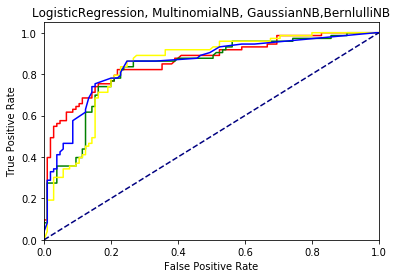

In [226]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr_lr, tpr_lr, color = 'red')
plt.plot(fpr_mult, tpr_mult, color = 'green')
plt.plot(fpr_gauss, tpr_gauss, color = 'yellow')
plt.plot(fpr_ber, tpr_ber, color = 'blue')
#
#
plt.plot([0,1],[0,1],color = 'navy', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title("LogisticRegression, MultinomialNB, GaussianNB,BernlulliNB")
plt.legend(loc = "lower right")
plt.show()